# 데이터 가져오기

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [8]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 데이터 전처리

## null값 제거

In [9]:
data = data.dropna()  # null 값 제거

## X,Y 데이터 설정

In [10]:
X = data.drop(['Outcome'],axis = 1)
X.head()
X = np.asarray(X)
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [11]:
len(X)

768

In [13]:
Y = data['Outcome'].values
Y = np.asarray(Y)
np.min(X,axis =0)
np.max(Y,axis = 0)

1

## 데이터 노멀라이즈


In [14]:
# 데이터 노멀라이즈
X = ((X - np.min(X, axis = 0)) / (np.max(X, axis = 0) - np.min(X, axis = 0)))
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## 훈련용 테스트용 데이터 분리

In [15]:
train_x = X[:int(len(X) * 0.8)]
train_y = Y[:int(len(X) * 0.8)]
test_x = X[int(len(X) * 0.8):]
test_y = Y[int(len(X) * 0.8):]

In [17]:
print("train x 데이터 :" , train_x.shape)
print("train y 데이터 :" , train_y.shape)
print("validation x 데이터 :" , test_x.shape)
print("validation y 데이터 :" , test_y.shape)

train x 데이터 : (614, 8)
train y 데이터 : (614,)
validation x 데이터 : (154, 8)
validation y 데이터 : (154,)


In [10]:
# 훈련용,테스트용 데이터 분리2
#from sklearn.model_selection import train_test_split

#train_x,test_x, train_y, test_y = \
#    train_test_split(X,Y,test_size = 0.2)

In [11]:
#print(train_x.shape, test_x.shape)

# 신경망 구축

In [12]:
from tensorflow import keras
EPOCHS = 100


In [13]:
model = keras.Sequential([
    keras.layers.Dense(8), #입력층
    keras.layers.Dense(16,activation = "tanh"),
    keras.layers.Dense(64,activation = "tanh"),
    keras.layers.Dense(256,activation = "tanh"),
    keras.layers.Dense(256,activation = "relu"),
    keras.layers.Dropout(rate = 0.3),
    keras.layers.Dense(1,activation = "sigmoid")
])

In [14]:
#  0,1에서는 binary_crossentropy
model.compile(optimizer= "adam", loss = "binary_crossentropy",metrics = ['accuracy'])

In [15]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 20)

In [16]:
history = model.fit(train_x,train_y, epochs = EPOCHS,
                    validation_data = (test_x, test_y),
                    callbacks = [early_stop])
    

2022-01-07 09:42:30.198163: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-07 09:42:30.199571: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 1s 2ms/sample - loss: 0.6645 - accuracy: 0.6564 - val_loss: 0.6267 - val_accuracy: 0.6494
Epoch 2/100
614/614 [==============================] - 0s 253us/sample - loss: 0.6173 - accuracy: 0.6645 - val_loss: 0.5838 - val_accuracy: 0.7403
Epoch 3/100
614/614 [==============================] - 0s 247us/sample - loss: 0.5815 - accuracy: 0.6987 - val_loss: 0.5413 - val_accuracy: 0.7338
Epoch 4/100
614/614 [==============================] - 0s 249us/sample - loss: 0.5593 - accuracy: 0.7280 - val_loss: 0.5368 - val_accuracy: 0.7597
Epoch 5/100
614/614 [==============================] - 0s 246us/sample - loss: 0.5479 - accuracy: 0.7280 - val_loss: 0.5167 - val_accuracy: 0.7273
Epoch 6/100
614/614 [==============================] - 0s 253us/sample - loss: 0.5277 - accuracy: 0.7362 - val_loss: 0.4883 - val_accuracy: 0.7857
Epoch 7/100
614/614 [==============================] - 0s 277us/sample - l

# 모델의 정확도 81%

In [17]:
np.max(history.history["val_accuracy"])

0.8116883

In [18]:
# 예측값 비교해보기
pred = model.predict(train_x[:5])
pred


array([[0.49149513],
       [0.0331609 ],
       [0.8320242 ],
       [0.00425655],
       [0.9576676 ]], dtype=float32)

In [19]:
train_y[:5]

array([1, 0, 1, 0, 1])

# 모델 시각화

In [20]:
import matplotlib.pyplot as plt

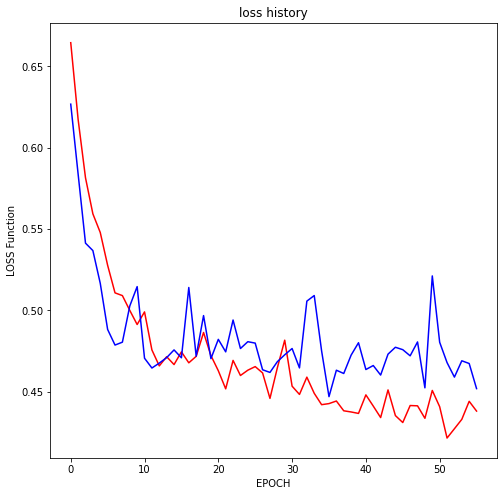

In [21]:
train_history = history.history["loss"]
validate_history = history.history["val_loss"]

fig = plt.figure(figsize = (8,8))
plt.title("loss history")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validate_history,"blue")
plt.show()

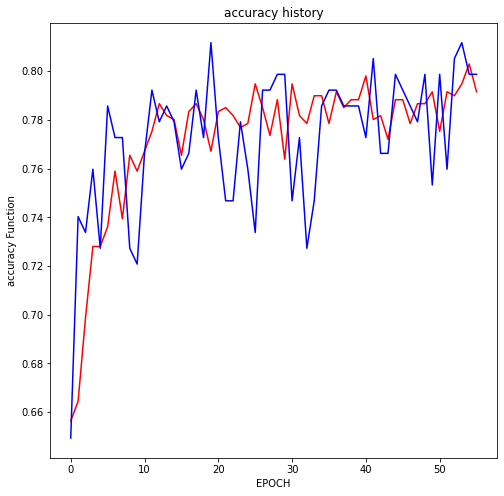

In [22]:
train_history = history.history['accuracy']
validate_history = history.history['val_accuracy']

fig = plt.figure(figsize = (8,8))
plt.title("accuracy history")
plt.xlabel("EPOCH")
plt.ylabel("accuracy Function")
plt.plot(train_history, "red")
plt.plot(validate_history,"blue")

plt.show()

In [ ]:
# 감사합니다.